# ENTROPY OF FOOTBALL STATISTICS

**In this document we will be conducting a search for frequent patterns. For that we will be converting non-binary columns in dataset to binary columns and then applying apriori algorithm to the aforemention transformed dataset.**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
statistics = pd.DataFrame()
for i in range (2016, 2019, 1):
    foldername = "Parsed_" + str(i) + "_" + str(i+1)[2:] + "/gwgamesStats/"
    for j in range(1,39,1):
        filename = "gw" + str(j) + ".csv"
        statistics = statistics.append(pd.read_csv(foldername + filename))

In [3]:
statistics

,name_h,attempted_passes_h,big_chances_created_h,big_chances_missed_h,clearances_blocks_interceptions_h,completed_passes_h,dribbles_h,errors_leading_to_goal_attempt_h,fixture_h,fouls_h,...,penalties_saved_a,recoveries_a,red_cards_a,saves_a,tackled_a,tackles_a,target_missed_a,team_score_a,yellow_cards_a,shots_on_target_a
0,Everton,357,0,1,61,261,8,0,3,10,...,0,39,0,5,26,8,4,1,0,4
1,Arsenal,485,0,1,36,385,8,0,8,13,...,1,50,0,2,21,9,3,4,3,7
2,Chelsea,559,0,0,19,481,16,0,10,16,...,0,64,0,4,19,18,2,1,2,3
3,Hull City,448,0,0,53,340,7,1,4,8,...,0,74,0,3,20,9,9,1,2,5
4,Middlesbrough,353,1,1,38,262,10,0,6,18,...,0,49,0,1,17,11,9,1,5,1
5,AFC Bournemouth,483,0,0,19,412,13,0,9,7,...,0,62,0,2,15,13,2,3,1,7
6,Manchester City,678,1,1,44,578,15,0,5,11,...,0,47,0,3,8,11,2,1,2,3
7,Southampton,579,0,0,37,494,10,0,7,8,...,0,55,1,6,13,15,4,1,2,1
8,Burnley,336,1,1,40,237,6,0,1,10,...,0,66,0,3,14,11,6,1,2,8
9,Crystal Palace,415,1,2,39,300,8,0,2,12,...,0,62,0,4,29,4,8,1,2,3


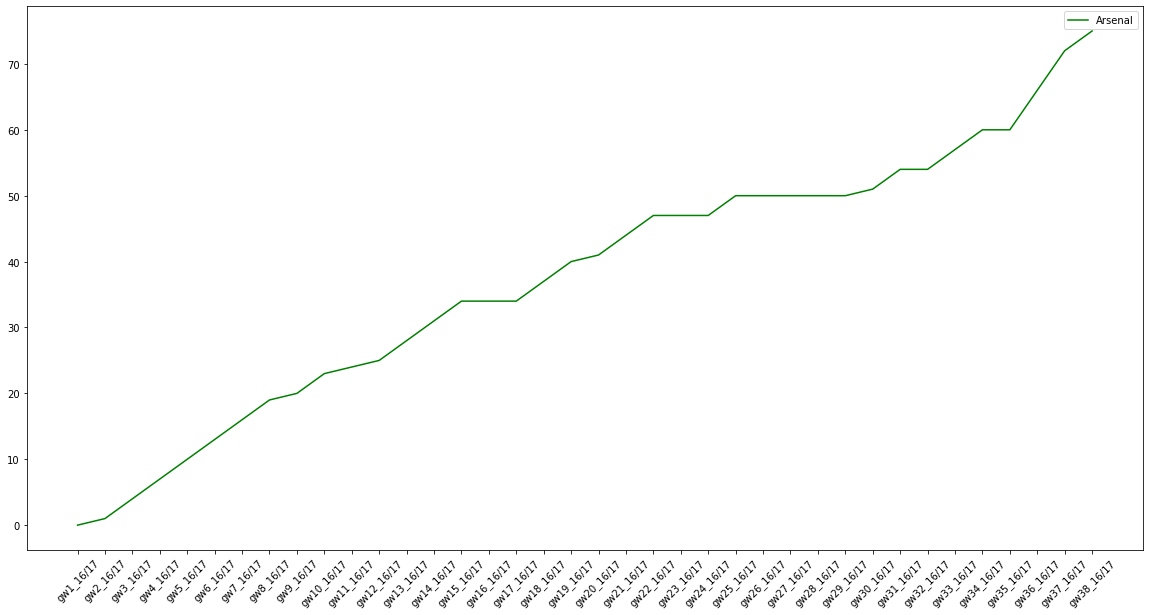

In [39]:
clubs = statistics['name_h'].unique()
clubs_points = dict()
gw_labels = []

for club in clubs:
    clubs_points[club] = []


foldername = "Parsed_2016_17/gwgamesStats/"
for j in range(1,39,1):
        filename = "gw" + str(j) + ".csv"
        gw_stats = pd.read_csv(foldername + filename)
        
        gw_labels.append("gw" + str(j) + "_16/17")
        
        for club in clubs_points:
            points = clubs_points[club]
            if (len(points) < 1):
                points.append(0)
            else:
                points.append(points[-1])
            clubs_points[club] = points
        
        for index, game_stats in gw_stats.iterrows():
            if game_stats['team_score_h'] > game_stats['team_score_a']:
                winners_points = clubs_points[game_stats['name_h']]
                winners_points[-1] += 3
                clubs_points[game_stats['name_h']] = winners_points
            elif game_stats['team_score_h'] < game_stats['team_score_a']:
                winners_points = clubs_points[game_stats['name_a']]
                winners_points[-1] += 3
                clubs_points[game_stats['name_a']] = winners_points
            else:
                team1_points = clubs_points[game_stats['name_h']]
                team2_points = clubs_points[game_stats['name_a']]
                team1_points[-1] += 1
                team2_points[-1] += 1
                clubs_points[game_stats['name_h']] = team1_points
                clubs_points[game_stats['name_a']] = team2_points
            
            
        #print(clubs_points['Arsenal'], end="\n\n")

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(gw_labels, clubs_points["Arsenal"],'g-', label="Arsenal")
plt.legend()
plt.show()
        


In [5]:
# Displaying all descriptive informations for all columns. 
pd.set_option('display.max_columns', 50)
statistics.describe()

,attempted_passes_h,big_chances_created_h,big_chances_missed_h,clearances_blocks_interceptions_h,completed_passes_h,dribbles_h,errors_leading_to_goal_attempt_h,fixture_h,fouls_h,key_passes_h,minutes_h,offside_h,open_play_crosses_h,opponent_team_h,penalties_conceded_h,penalties_missed_h,penalties_saved_h,recoveries_h,red_cards_h,round_h,saves_h,tackled_h,tackles_h,target_missed_h,team_score_h,yellow_cards_h,shots_on_target_h,attempted_passes_a,big_chances_created_a,big_chances_missed_a,clearances_blocks_interceptions_a,completed_passes_a,dribbles_a,errors_leading_to_goal_attempt_a,fouls_a,key_passes_a,offside_a,open_play_crosses_a,penalties_conceded_a,penalties_missed_a,penalties_saved_a,recoveries_a,red_cards_a,saves_a,tackled_a,tackles_a,target_missed_a,team_score_a,yellow_cards_a,shots_on_target_a
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.00000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,461.819298,1.388596,1.065789,37.743860,368.271053,9.557895,0.271053,190.500000,10.488596,10.241228,33.392105,2.162281,3.280702,10.500000,0.103509,0.041228,0.012281,61.758772,0.049123,19.599123,2.633333,16.794737,8.257018,5.385088,1.565789,1.592105,4.730702,438.903509,1.131579,0.875439,43.107895,344.393860,8.882456,0.300877,10.809649,8.27807,1.864912,2.538596,0.150000,0.018421,0.035088,60.679825,0.062281,3.164912,16.754386,8.200877,4.338596,1.200877,1.718421,3.834211
std,140.103589,1.397619,1.184501,12.842095,142.749986,4.429645,0.536012,109.744315,3.351890,4.831731,40.763324,1.704968,2.184263,5.768812,0.307623,0.207545,0.110184,8.379742,0.224193,11.088035,1.837263,5.220340,3.774329,2.745248,1.319159,1.254782,2.711522,135.715693,1.178630,1.032532,13.459911,137.579911,4.262692,0.569798,3.507635,3.94061,1.576606,1.871955,0.392366,0.134527,0.188791,8.691581,0.245375,2.164645,5.119917,3.895812,2.329583,1.195176,1.266372,2.312250
min,176.000000,0.000000,0.000000,4.000000,94.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,173.000000,0.000000,0.000000,10.000000,91.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.000000,0.000000,0.000000,29.000000,264.000000,6.000000,0.000000,95.750000,8.000000,7.000000,0.000000,1.000000,2.000000,5.750000,0.000000,0.000000,0.000000,56.000000,0.000000,10.000000,1.000000,13.000000,5.000000,3.000000,1.000000,1.000000,3.000000,339.000000,0.000000,0.000000,33.000000,240.000000,6.000000,0.000000,8.000000,5.00000,1.000000,1.000000,0.000000,0.000000,0.000000,55.000000,0.000000,2.000000,13.000000,5.000000,3.000000,0.000000,1.000000,2.000000
50%,444.000000,1.000000,1.000000,37.000000,348.500000,9.000000,0.000000,190.500000,10.000000,10.000000,0.000000,2.000000,3.000000,10.500000,0.000000,0.000000,0.000000,62.000000,0.000000,19.500000,2.000000,16.000000,8.000000,5.000000,1.000000,1.000000,4.000000,417.000000,1.000000,1.000000,42.500000,322.000000,8.000000,0.000000,10.000000,8.00000,2.000000,2.000000,0.000000,0.000000,0.000000,61.000000,0.000000,3.000000,16.000000,8.000000,4.000000,1.000000,2.000000,4.000000
75%,549.250000,2.000000,2.000000,46.000000,458.250000,12.000000,0.000000,285.250000,13.000000,13.000000,90.000000,3.000000,4.000000,15.250000,0.000000,0.000000,0.000000,67.000000,0.000000,29.000000,4.000000,20.000000,11.000000,7.000000,

In [40]:
def encode_numeric_to_binary(dataframe, column_name, ranges, is_single=False):
    # Method generates binary columns from user defined ranges.
    #     dataframe : pandas dataframe, where the binary columns are put.
    #     column_name : the column that is transformed into binary columns.
    #     is_single : truth value that determines whether values in ranges array are interpreted as columns individually or in pairs.
    
    if is_single:
        for i in range(0,len(ranges)):
            binary_column_name = column_name + "_" + str(ranges[i])
            dataframe[binary_column_name] = np.where((dataframe[column_name] == ranges[i]), 1, 0)
    else:
        for i in range(0,len(ranges)):
            binary_column_name = column_name + "_" + str(ranges[i][0]) + "-" + str(ranges[i][1])
            dataframe[binary_column_name] = np.where((ranges[i][0] <= dataframe[column_name])&(dataframe[column_name] <= ranges[i][1]), 1, 0)
            

    return dataframe.drop(columns=[column_name], axis=1)

def generate_ranges(dataframe, column_name, slices=10):
    #print(dataframe.describe())
    print(column_name + ": " , end="")
    mean = dataframe[column_name].mean()
    s_deviation = dataframe[column_name].std()
    min_value = dataframe[column_name].min()
    max_value = dataframe[column_name].max()
    print("Mean=", mean, "; S_dev=", s_deviation, "; min_value=", min_value, "; max_value:", max_value)
    generated_ranges = []
    last_value = 0
    for i, value in enumerate([min_value] + list(range(int(mean-s_deviation), int(mean+s_deviation)+1, max(1, int(int(mean+s_deviation) - int(mean-s_deviation))//slices))) + [max_value]):
        if(i != 0 and last_value >= 0 and value > 0):
            generated_ranges.append((last_value, value-1))
        last_value = value
    return generated_ranges
            
        
statistics_binary = statistics.copy(deep=True)

for suffix in ["_h", "_a"]:
    if (suffix == "_h"):
        statistics_binary = statistics_binary.drop(columns=['fixture'+suffix, 'round'+suffix, 'minutes'+suffix, 'opponent_team'+suffix], axis=1)

    # Transforming numeric columns into binary columns.
    # Encoding attempted passes
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'attempted_passes'+suffix, generate_ranges(statistics, 'attempted_passes'+suffix))
    # Encoding big_chances_created
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'big_chances_created'+suffix, [1,2,3,4,5,6,7,8], 1)
    # Encoding big_chances_missed0
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'big_chances_missed'+suffix, [1,2,3,4,5,6], 1)
    # Encoding clearances_blocks_interceptions
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'clearances_blocks_interceptions'+suffix, generate_ranges(statistics, 'clearances_blocks_interceptions'+suffix))
    # Encoding completed_passes
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'completed_passes'+suffix, generate_ranges(statistics, 'completed_passes'+suffix))
    # Encoding dribbles
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'dribbles'+suffix, generate_ranges(statistics, 'dribbles'+suffix))
    # Encoding errors_leading_to_goal_attempt
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'errors_leading_to_goal_attempt'+suffix, [1,2,3,4], 1)
    # Encoding fouls
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'fouls'+suffix, generate_ranges(statistics, 'fouls'+suffix))
    # Encoding key_passes
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'key_passes'+suffix, generate_ranges(statistics, 'key_passes'+suffix))
    # Encoding offside
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'offside'+suffix, generate_ranges(statistics, 'offside'+suffix))
    # Encoding open_play_crosses
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'open_play_crosses'+suffix, generate_ranges(statistics, 'open_play_crosses'+suffix))
    # Encoding opponent_team
    #statistics_binary = encode_numeric_to_binary(statistics_binary, 'opponent_team'+suffix, list(range(20)), 1)
    # Encoding penalties_conceded
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'penalties_conceded'+suffix, [1,2], 1)
    # Encoding penalties_missed
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'penalties_missed'+suffix, [1,2], 1)
    # Encoding penalties_saved
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'penalties_saved'+suffix, [1,2], 1)
    # Encoding recoveries
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'recoveries'+suffix, generate_ranges(statistics, 'recoveries'+suffix))
    # Encoding red_cards
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'red_cards'+suffix, [1,2], 1)
    # Encoding saves
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'saves'+suffix, generate_ranges(statistics, 'saves'+suffix))
    # Encoding tackled
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'tackled'+suffix, generate_ranges(statistics, 'tackled'+suffix))
    # Encoding tackles
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'tackles'+suffix, generate_ranges(statistics, 'tackles'+suffix))
    # Encoding target_missed
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'target_missed'+suffix, generate_ranges(statistics, 'target_missed'+suffix))
    # Encoding team_score
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'team_score'+suffix, [0,1,2,3,4,5,6,7],1)
    # Encoding yellow_cards
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'yellow_cards'+suffix, generate_ranges(statistics, 'yellow_cards'+suffix))
    # Encoding shots_on_target
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'shots_on_target'+suffix, generate_ranges(statistics, 'shots_on_target'+suffix))
    # Encoding name
    for name in list(statistics_binary["name"+suffix].unique()):
        statistics_binary[name] = np.where((statistics_binary["name"+suffix] == name), 1, 0)
    statistics_binary = statistics_binary.drop(columns=["name"+suffix], axis=1)

"""
# Dropping useless columns.
for suffix in ["_h", "_a"]:
    if (suffix == "_h"):
        statistics_binary = statistics_binary.drop(columns=['fixture'+suffix, 'round'+suffix, 'minutes'+suffix, 'opponent_team'+suffix], axis=1)

    # Transforming numeric columns into binary columns.
    # Encoding attempted passes
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'attempted_passes'+suffix, [(0,249), (250,539), (540,1015)])
    # Encoding big_chances_created
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'big_chances_created'+suffix, [0,1,2,3,4,5,6,7,8], 1)
    # Encoding big_chances_missed0
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'big_chances_missed'+suffix, [0,1,2,3,4,5,6], 1)
    # Encoding clearances_blocks_interceptions
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'clearances_blocks_interceptions'+suffix, [(10,19), (20,39), (40,49), (50,59), (60,69), (70,79), (80,89), (90,99)])
    # Encoding completed_passes
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'completed_passes'+suffix, [(0,249), (250,539), (540,1015)])
    # Encoding dribbles
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'dribbles'+suffix, [(0,0),(0,1),(2,5),(6,12),(13,28)])
    # Encoding errors_leading_to_goal_attempt
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'errors_leading_to_goal_attempt'+suffix, [1,2,3,4], 1)
    # Encoding fouls
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'fouls'+suffix, [(0,1),(2,7),(8,13),(14,26)])
    # Encoding key_passes
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'key_passes'+suffix, [(0,5), (6,12), (13,32)])
    # Encoding offside
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'offside'+suffix, [(0,1), (2,3), (4,10)])
    # Encoding open_play_crosses
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'open_play_crosses'+suffix, [(0,0), (1,4), (5,10)])
    # Encoding opponent_team
    #statistics_binary = encode_numeric_to_binary(statistics_binary, 'opponent_team'+suffix, list(range(20)), 1)
    # Encoding penalties_conceded
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'penalties_conceded'+suffix, [1,2], 1)
    # Encoding penalties_missed
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'penalties_missed'+suffix, [1,2], 1)
    # Encoding penalties_saved
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'penalties_saved'+suffix, [1,2], 1)
    # Encoding recoveries
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'recoveries'+suffix, [(20,54), (55,66), (67,94)])
    # Encoding red_cards
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'red_cards'+suffix, [1, 2], 1)
    # Encoding saves
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'saves'+suffix, [(0,1), (2,5), (6,14)])
    # Encoding tackled
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'tackled'+suffix, [(0,1), (2,11), (12,19), (20,38)])
    # Encoding tackles
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'tackles'+suffix, [(0,1),(2,4),(5,10),(11,26)])
    # Encoding target_missed
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'target_missed'+suffix, [(0,1),(2,6),(7,16)])
    # Encoding team_score
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'team_score'+suffix, [0,1,2,3,4,5,6,7],1)
    # Encoding yellow_cards
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'yellow_cards'+suffix, [(0,0), (1,2), (3,16)])
    # Encoding shots_on_target
    statistics_binary = encode_numeric_to_binary(statistics_binary, 'shots_on_target'+suffix, [(0,0), (1,2), (3,9), (10,17)])
    # Encoding name
    for name in list(statistics_binary["name"+suffix].unique()):
        statistics_binary[name] = np.where((statistics_binary["name"+suffix] == name), 1, 0)
    statistics_binary = statistics_binary.drop(columns=["name"+suffix], axis=1)
statistics_binary
"""    
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 400)
statistics_binary

attempted_passes_h: Mean= 461.81929824561405 ; S_dev= 140.10358884118443 ; min_value= 176 ; max_value: 1015
clearances_blocks_interceptions_h: Mean= 37.743859649122804 ; S_dev= 12.842095200792558 ; min_value= 4 ; max_value: 97
completed_passes_h: Mean= 368.2710526315789 ; S_dev= 142.74998633771494 ; min_value= 94 ; max_value: 942
dribbles_h: Mean= 9.557894736842105 ; S_dev= 4.429645019872293 ; min_value= 0 ; max_value: 28
fouls_h: Mean= 10.488596491228071 ; S_dev= 3.3518896108709253 ; min_value= 0 ; max_value: 24
key_passes_h: Mean= 10.241228070175438 ; S_dev= 4.831730638847264 ; min_value= 0 ; max_value: 32
offside_h: Mean= 2.162280701754386 ; S_dev= 1.7049682270102668 ; min_value= 0 ; max_value: 10
open_play_crosses_h: Mean= 3.280701754385965 ; S_dev= 2.1842631830551658 ; min_value= 0 ; max_value: 13
recoveries_h: Mean= 61.75877192982456 ; S_dev= 8.37974177641666 ; min_value= 37 ; max_value: 94
saves_h: Mean= 2.6333333333333333 ; S_dev= 1.8372626633757956 ; min_value= 0 ; max_value: 

,attempted_passes_h_176-320,attempted_passes_h_321-348,attempted_passes_h_349-376,attempted_passes_h_377-404,attempted_passes_h_405-432,attempted_passes_h_433-460,attempted_passes_h_461-488,attempted_passes_h_489-516,attempted_passes_h_517-544,attempted_passes_h_545-572,attempted_passes_h_573-600,attempted_passes_h_601-1014,big_chances_created_h_1,big_chances_created_h_2,big_chances_created_h_3,big_chances_created_h_4,big_chances_created_h_5,big_chances_created_h_6,big_chances_created_h_7,big_chances_created_h_8,big_chances_missed_h_1,big_chances_missed_h_2,big_chances_missed_h_3,big_chances_missed_h_4,big_chances_missed_h_5,big_chances_missed_h_6,clearances_blocks_interceptions_h_4-23,clearances_blocks_interceptions_h_24-25,clearances_blocks_interceptions_h_26-27,clearances_blocks_interceptions_h_28-29,clearances_blocks_interceptions_h_30-31,clearances_blocks_interceptions_h_32-33,clearances_blocks_interceptions_h_34-35,clearances_blocks_interceptions_h_36-37,clearances_blocks_interceptions_h_38-39,clearances_blocks_interceptions_h_40-41,clearances_blocks_interceptions_h_42-43,clearances_blocks_interceptions_h_44-45,clearances_blocks_interceptions_h_46-47,clearances_blocks_interceptions_h_48-49,clearances_blocks_interceptions_h_50-96,completed_passes_h_94-224,completed_passes_h_225-252,completed_passes_h_253-280,completed_passes_h_281-308,completed_passes_h_309-336,completed_passes_h_337-364,completed_passes_h_365-392,completed_passes_h_393-420,completed_passes_h_421-448,completed_passes_h_449-476,completed_passes_h_477-504,completed_passes_h_505-941,dribbles_h_0-4,dribbles_h_5-5,dribbles_h_6-6,dribbles_h_7-7,dribbles_h_8-8,dribbles_h_9-9,dribbles_h_10-10,dribbles_h_11-11,dribbles_h_12-12,dribbles_h_13-27,errors_leading_to_goal_attempt_h_1,errors_leading_to_goal_attempt_h_2,errors_leading_to_goal_attempt_h_3,errors_leading_to_goal_attempt_h_4,fouls_h_0-6,fouls_h_7-7,fouls_h_8-8,fouls_h_9-9,fouls_h_10-10,fouls_h_11-11,fouls_h_12-12,fouls_h_13-23,key_passes_h_0-4,key_passes_h_5-5,key_passes_h_6-6,key_passes_h_7-7,key_passes_h_8-8,key_passes_h_9-9,key_passes_h_10-10,key_passes_h_11-11,key_passes_h_12-12,key_passes_h_13-13,key_passes_h_14-14,key_passes_h_15-31,offside_h_0-0,offside_h_1-1,offside_h_2-2,offside_h_3-9,open_play_crosses_h_0-0,open_play_crosses_h_1-1,open_play_crosses_h_2-2,open_play_crosses_h_3-3,open_play_crosses_h_4-4,open_play_crosses_h_5-12,penalties_conceded_h_1,penalties_conceded_h_2,penalties_missed_h_1,penalties_missed_h_2,penalties_saved_h_1,penalties_saved_h_2,recoveries_h_37-52,recoveries_h_53-53,recoveries_h_54-54,recoveries_h_55-55,recoveries_h_56-56,recoveries_h_57-57,recoveries_h_58-58,recoveries_h_59-59,recoveries_h_60-60,recoveries_h_61-61,recoveries_h_62-62,recoveries_h_63-63,recoveries_h_64-64,recoveries_h_65-65,recoveries_h_66-66,recoveries_h_67-67,recoveries_h_68-68,recoveries_h_69-69,recoveries_h_70-93,red_cards_h_1,red_cards_h_2,saves_h_0-0,saves_h_1-1,saves_h_2-2,saves_h_3-3,saves_h_4-12,tackled_h_0-10,tackled_h_11-11,tackled_h_12-12,tackled_h_13-13,tackled_h_14-14,tackled_h_15-15,tackled_h_16-16,tackled_h_17-17,tackled_h_18-18,tackled_h_19-19,tackled_h_20-20,tackled_h_21-21,tackled_h_22-37,tackles_h_0-3,tackles_h_4-4,tackles_h_5-5,tackles_h_6-6,tackles_h_7-7,tackles_h_8-8,tackles_h_9-9,tackles_h_10-10,tackles_h_11-11,tackles_h_12-23,target_missed_h_0-1,target_missed_h_2-2,target_missed_h_3-3,target_missed_h_4-4,target_missed_h_5-5,target_missed_h_6-6,target_missed_h_7-7,target_missed_h_8-15,team_score_h_0,team_score_h_1,team_score_h_2,team_score_h_3,team_score_h_4,team_score_h_5,team_score_h_6,team_score_h_7,yellow_cards_h_0-0,yellow_cards_h_1-1,yellow_cards_h_2-5,shots_on_target_h_0-1,shots_on_target_h_2-2,shots_on_target_h_3-3,shots_on_target_h_4-4,shots_on_target_h_5-5,shots_on_target_h_6-6,shots_on_target_h_7-16,Everton,Arsenal,Chelsea,Hull City,Middlesbrough,AFC Bournemouth,Manchester City,Southampton,Burnley,Crystal Palace,West Ham United,Watford,Sunderland,Leicester City,Norwich City,M

In [41]:
# Displaying all the rules and patterns found using frequent pattern mining techniques.
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Finding frequent patterns in dataset
pd.set_option('display.max_rows', 1200)
pd.set_option('display.max_colwidth', 200)
frequent_itemset = apriori(statistics_binary, min_support=0.1, use_colnames=True)
frequent_itemset

# Finding rules
mlx_rules = association_rules(frequent_itemset, metric='confidence', min_threshold=0.62)
mlx_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(completed_passes_h_94-224),(attempted_passes_h_176-320),0.153509,0.152632,0.140351,0.914286,5.990148,0.116921,9.885965
1,(attempted_passes_h_176-320),(completed_passes_h_94-224),0.152632,0.153509,0.140351,0.919540,5.990148,0.116921,10.520677
2,(completed_passes_h_505-941),(attempted_passes_h_601-1014),0.171930,0.164912,0.161404,0.938776,5.692575,0.133050,13.639766
3,(attempted_passes_h_601-1014),(completed_passes_h_505-941),0.164912,0.171930,0.161404,0.978723,5.692575,0.133050,38.919298
4,(fouls_h_13-23),(yellow_cards_h_2-5),0.257895,0.482456,0.171930,0.666667,1.381818,0.047507,1.552632
5,(key_passes_a_12-21),(saves_h_4-12),0.200877,0.297368,0.128947,0.641921,2.158674,0.069213,1.962227
6,(shots_on_target_a_6-14),(saves_h_4-12),0.225439,0.297368,0.192105,0.852140,2.865604,0.125067,4.752008
7,(saves_h_4-12),(shots_on_target_a_6-14),0.297368,0.225439,0.192105,0.646018,2.865604,0.125067,2.188136
8,(shots_on_target_h_7-16),(saves_a_5-13),0.229825,0.235088,0.173684,0.755725,3.214652,0.119655,3.131360
9,(saves_a_5-13),(shots_on_target_h_7-16),0.235088,0.229825,0.173684,0.738806,3.214652,0.119655,2.948672
